**Fetching directories in variables train_dsr & test_dir**

In [1]:
import os
from sklearn.model_selection import train_test_split  #train_test_split function to control the percentage of the validation set.

base_dir = 'dataset/Split_Dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training Glioma pictures
train_h_dir = os.path.join(train_dir, 'Healthy_Image')

# Directory with our training meningioma pictures
train_uh_dir = os.path.join(train_dir, 'Unhealthy_Image')

# Directory with our testing Glioma pictures
test_h_dir = os.path.join(test_dir, 'Healthy_Image')

# Directory with our testing meningioma pictures
test_uh_dir = os.path.join(test_dir, 'Unhealthy_Image')

# Directory with our testing notumor pictures
validation_h_dir = os.path.join(validation_dir, 'Healthy_Image')

# Directory with our testing pituitary pictures
validation_uh_dir = os.path.join(validation_dir, 'Unhealthy_Image')


**Checking the no. of data contained by each class**

In [2]:
import os

def count_images_in_directory(directory):
    return sum([len(files) for root, dirs, files in os.walk(directory)])

def count_images_per_class(directory):
    classes = os.listdir(directory)
    class_counts = {}

    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_count = count_images_in_directory(class_path)
            class_counts[class_name] = class_count

    return class_counts

# Directory paths
train_dir = 'dataset/Split_Dataset/train'
validation_dir = 'dataset/Split_Dataset/validation'
test_dir = 'dataset/Split_Dataset/test'

# Count original images per class
train_class_counts = count_images_per_class(train_dir)
validation_class_counts = count_images_per_class(validation_dir)
test_class_counts = count_images_per_class(test_dir)

# Display the counts per class with class names
print("Number of original training images per class:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images")

print("\nNumber of original validation images per class:")
for class_name, count in validation_class_counts.items():
    print(f"{class_name}: {count} images")

print("\nNumber of original test images per class:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} images")


Number of original training images per class:
Healthy_Images: 376 images
Unhealthy_Images: 380 images

Number of original validation images per class:
Healthy_Images: 100 images
Unhealthy_Images: 101 images

Number of original test images per class:
Healthy_Images: 25 images
Unhealthy_Images: 25 images


**Showing some fetched data**

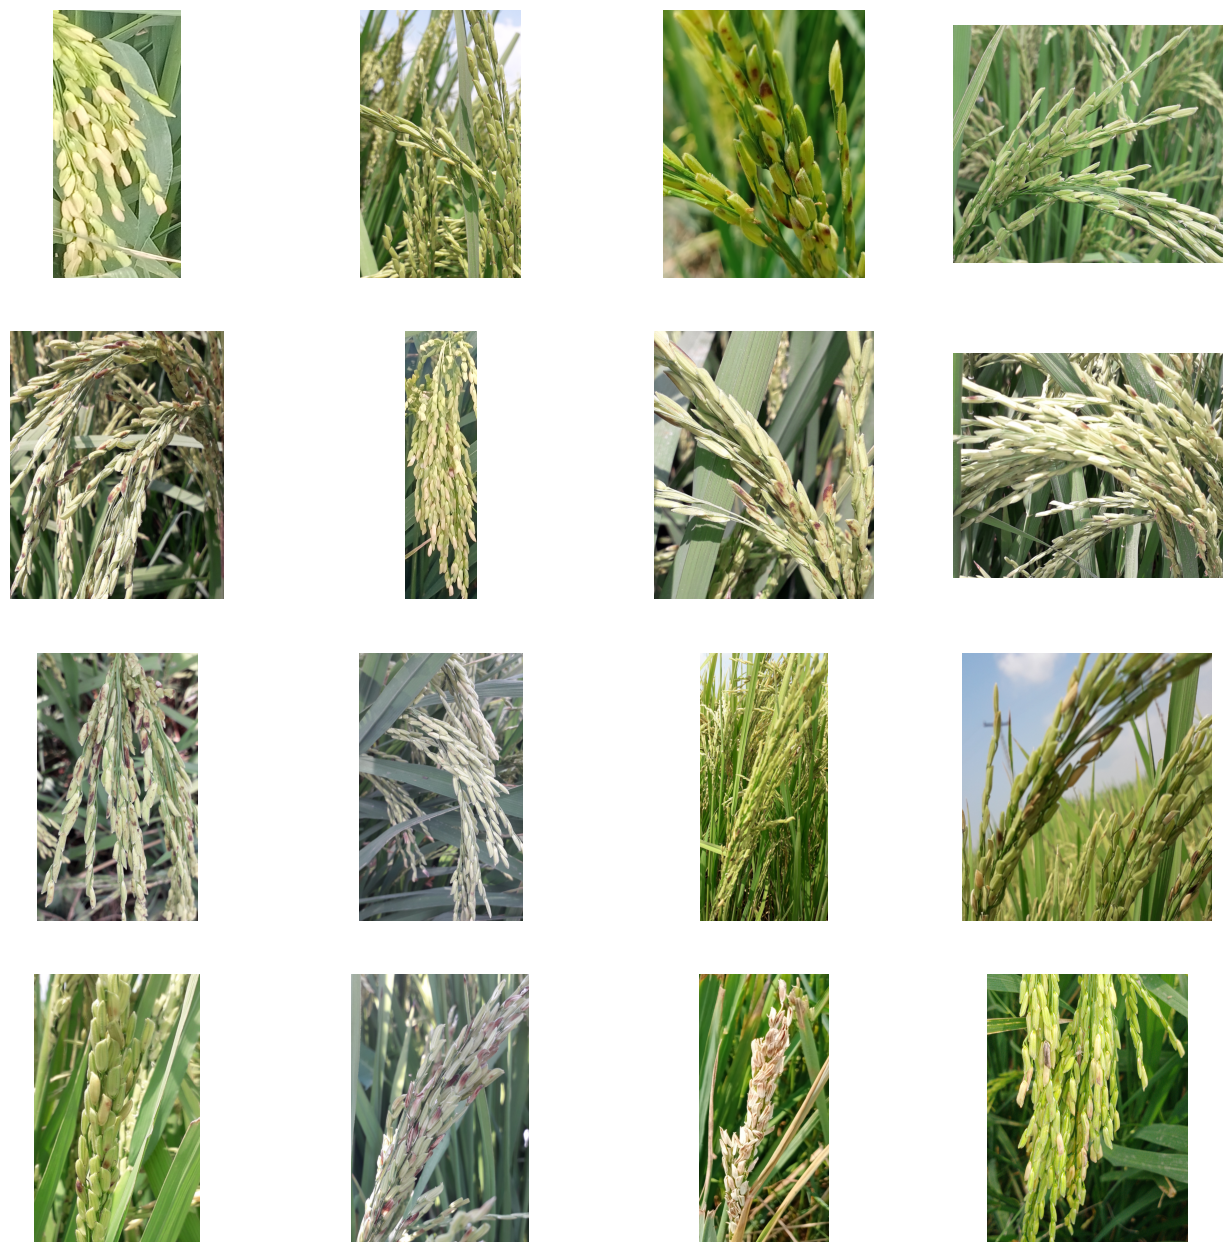

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

train_h_dir = "dataset/Split_Dataset/train/Healthy_Images"
train_uh_dir = "dataset/Split_Dataset/train/Unhealthy_Images"
validation_h_dir = "dataset/Split_Dataset/validation/Healthy_Images"
validation_uh_dir = "dataset/Split_Dataset/validation/Unhealthy_Images"


pic_index = 100
train_h_fnames = os.listdir(train_h_dir)
train_uh_fnames = os.listdir(train_uh_dir)
validation_h_fnames = os.listdir(validation_h_dir)
validation_uh_fnames = os.listdir(validation_uh_dir)

# Combine the image paths
all_image_paths = (
    [os.path.join(train_h_dir, fname) for fname in train_h_fnames[pic_index-8:pic_index]] +
    [os.path.join(train_uh_dir, fname) for fname in train_uh_fnames[pic_index-8:pic_index]] +
    [os.path.join(validation_h_dir, fname) for fname in validation_h_fnames[pic_index-8:pic_index]] +
    [os.path.join(validation_uh_dir, fname) for fname in validation_uh_fnames[pic_index-8:pic_index]]
)

# Shuffle the image paths
random.shuffle(all_image_paths)

# Display only 16 images or fewer
for i, img_path in enumerate(all_image_paths[:16]):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


**Data Augmentation to make more photos**

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator settings
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2,  # Add height shift
    brightness_range=[0.4, 1.2],  # Adjust brightness
    fill_mode='nearest'
)


valid_datagen = ImageDataGenerator(rescale=1./255)   #Normalization

test_datagen = ImageDataGenerator(rescale=1./255)    #Noemalization

# Training Set
train_set = train_datagen.flow_from_directory(train_dir,
                                             target_size=(224, 224),
                                             batch_size=20,
                                             class_mode='categorical')

# Validation Set
valid_set = valid_datagen.flow_from_directory(validation_dir,
                                              target_size=(224, 224),
                                              batch_size=10,
                                              class_mode='categorical',
                                              shuffle=False)

# Test Set
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=10,
                                            class_mode='categorical',
                                            shuffle=False)


Found 756 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


Found 50 images belonging to 2 classes.


In [22]:
label_dict = train_set.class_indices
rice_type = list(label_dict.keys())
images,labels=next(train_set)

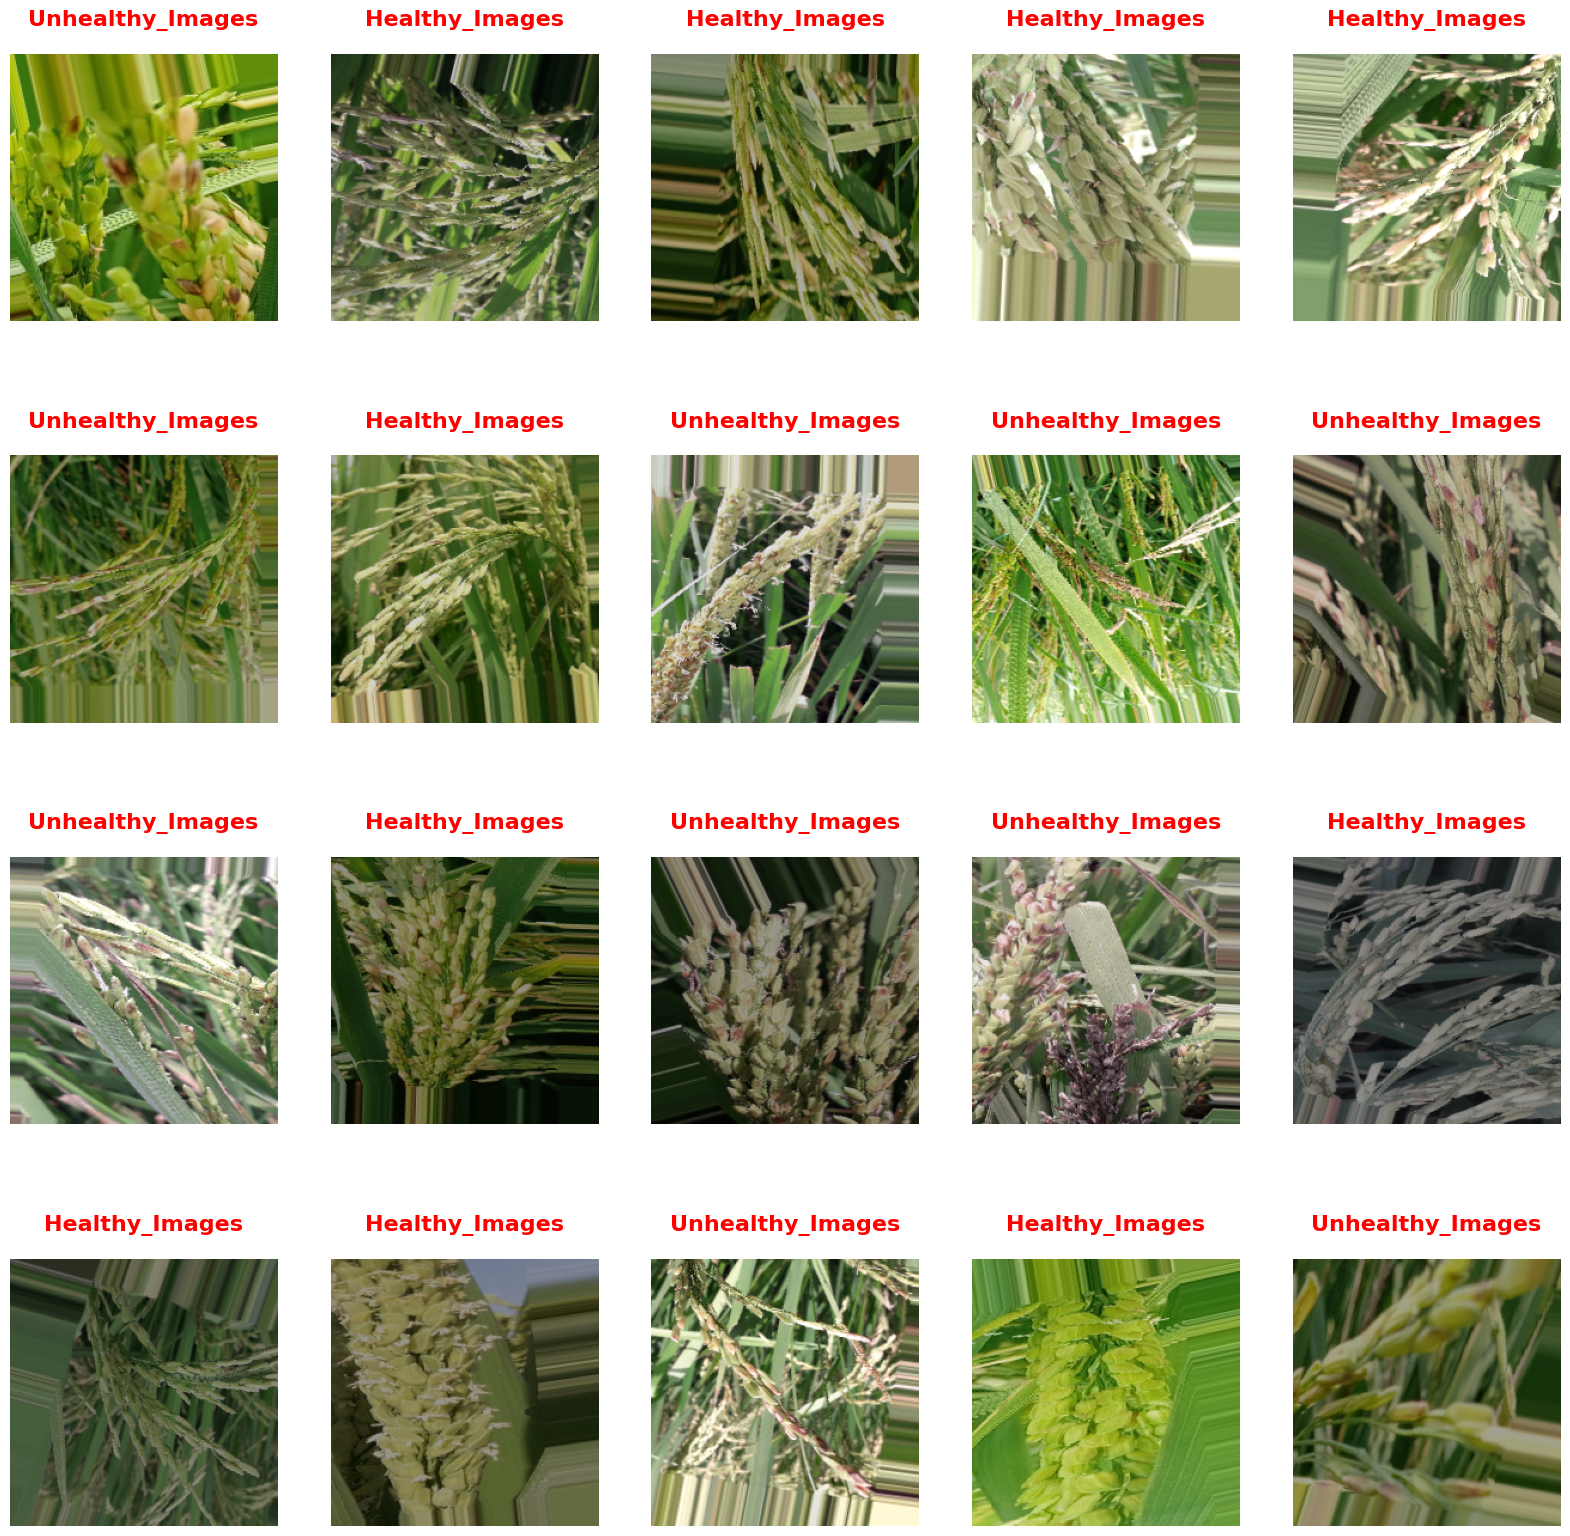

In [23]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
rcParams['axes.titlepad'] = 20

for i in range(20):
    plt.subplot(4, 5, i + 1)
    image = images[i]  # No normalization needed if already in range 0-1
    plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale images
    index = np.argmax(labels[i])
    rice_type_name = rice_type[index]
    color = 'green' if rice_type_name == 'Healthy' else 'red'
    plt.title(rice_type_name, fontsize=16, fontweight='bold', color=color)
    plt.axis('off')

plt.show()



In [24]:
# Fixing the seed for random number generators
import random
from keras.backend import clear_session
import numpy as np
import tensorflow as tf

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


**VGG 16 Model**

In [25]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

**Basic VGG16 Weighte Not Upadated**

In [26]:
#To set the layers to non-trainable (weights will not be updated)
for layer in base_model.layers:
    layer.trainable = False

**Last Layer changed as per below**

In [27]:
from tensorflow.keras import layers
import tensorflow as tf

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

from tensorflow.keras import optimizers

learning_rate=0.0001

model.compile(optimizer = optimizers.Adam(learning_rate=learning_rate), loss = 'binary_crossentropy',metrics = ['acc'])
#model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [28]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history = model.fit(train_set, validation_data = valid_set, epochs = 25)

Epoch 1/25
38/38 [==============================] - 340s 9s/step - loss: 0.8553 - acc: 0.5000 - val_loss: 0.7076 - val_acc: 0.5000
Epoch 2/25
38/38 [==============================] - 364s 10s/step - loss: 0.7046 - acc: 0.5000 - val_loss: 0.6946 - val_acc: 0.5000
Epoch 3/25
38/38 [==============================] - 366s 10s/step - loss: 0.6947 - acc: 0.5000 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 4/25
38/38 [==============================] - 364s 10s/step - loss: 0.6937 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 5/25
38/38 [==============================] - 364s 10s/step - loss: 0.6935 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 6/25
38/38 [==============================] - 373s 10s/step - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 7/25
38/38 [==============================] - 363s 10s/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/25
38/38 [==============================] - 362s 10s/step - loss: 0.6

In [29]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [55]:
model.save('Healthy.h5')

/home/love/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Model Loss Plotting**

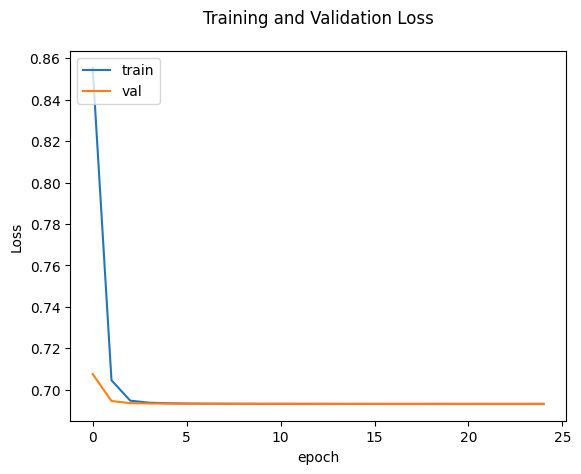

In [30]:
import keras
from matplotlib import pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Model Accuracy Plotting**

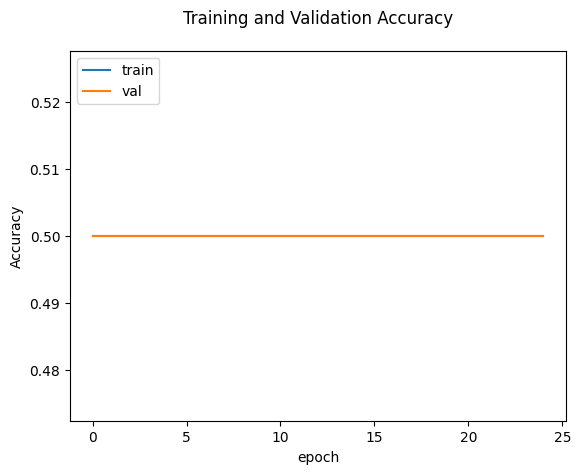

In [32]:
import keras
from matplotlib import pyplot as plt


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Precision, Recall, F1Score**

In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Reset the test set generator
test_set.reset()

# Predict probabilities for the test set
y_pred_proba = model.predict(test_set)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Get the true labels from the test set
y_true = test_set.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Calculate precision
precision = precision_score(y_true, y_pred_classes, average='weighted')

# Calculate recall
recall = recall_score(y_true, y_pred_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Print the metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


5/5 [==============================] - 21s 3s/step
Test Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1 Score: 0.33333333333333326


/home/love/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Confusion Matrix of Test Set**

In [34]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

/tmp/ipykernel_5158/769506795.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = model.predict_generator(test_set)


In [35]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

**Missclassification Test Images**

In [36]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from Testing images : %d'%misclassified['y'].count())


Total misclassified image from Testing images : 18


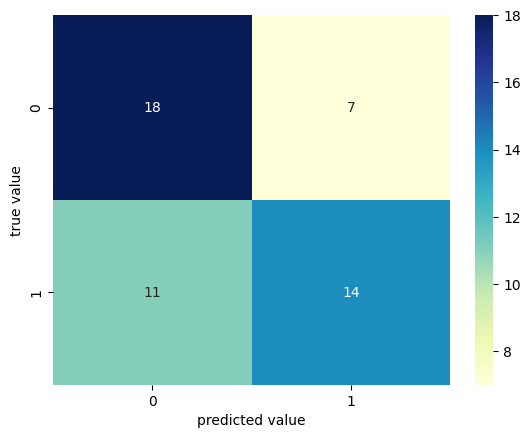

In [37]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

**Confusion Matrix of Train Set**

In [38]:
import pandas as pd
train_set.reset
ytrainhat = model.predict_generator(train_set)
df = pd.DataFrame({
    'filename':train_set.filenames,
    'predict':ytrainhat[:,0],
    'y':train_set.classes
})

/tmp/ipykernel_5158/1897391606.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytrainhat = model.predict_generator(train_set)


In [39]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [40]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from Training images : %d'%misclassified['y'].count())

Total misclassified image from Training images : 369


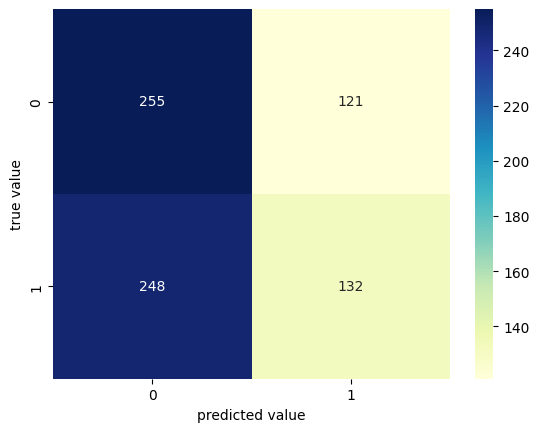

In [41]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

**confusion matrix of validation set**

In [42]:
import pandas as pd
valid_set.reset
yvalidhat = model.predict_generator(valid_set)
df = pd.DataFrame({
    'filename':valid_set.filenames,
    'predict':yvalidhat[:,0],
    'y':valid_set.classes
})

/tmp/ipykernel_5158/4155108745.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yvalidhat = model.predict_generator(valid_set)


In [43]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [44]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from Validation images : %d'%misclassified['y'].count())

Total misclassified image from Validation images : 82


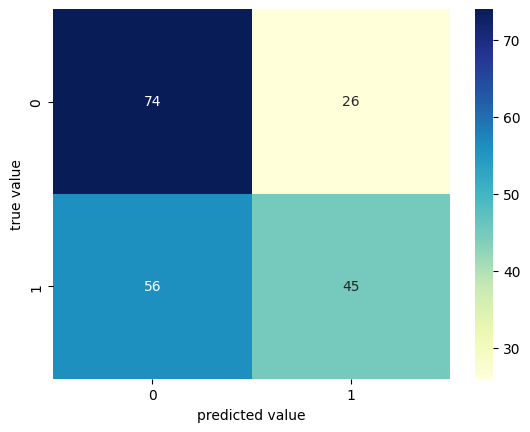

In [45]:
#Prediction of valid set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

**Prediction**

1/1 [==============================] - 0s 413ms/step


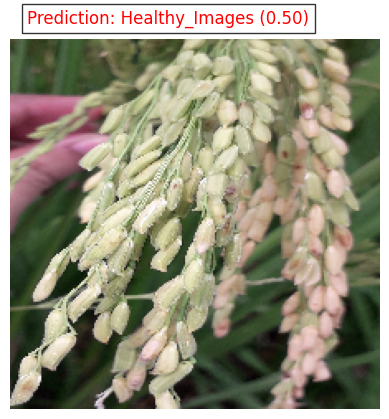

In [49]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
img1 = image.load_img('dataset/Split_Dataset/test/Healthy_Images/healthy (170).jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img / 255
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Map prediction probabilities to class names
class_names = ['Healthy_Images', 'Unhealthy_Images']
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]
predicted_class_probability = prediction[0][predicted_class_index]

# Assuming you have the ground truth label for the image
ground_truth_label = 'Healthy_Image'  # Replace this with the actual ground truth label
accuracy = 1 if predicted_class_name == ground_truth_label else 0

# Display the image with prediction
plt.imshow(img1)
plt.axis('off')

# Display prediction label with probability and accuracy
plt.text(10, -10, f'Prediction: {predicted_class_name} ({predicted_class_probability:.2f})', color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))


plt.show()


1/1 [==============================] - 0s 372ms/step


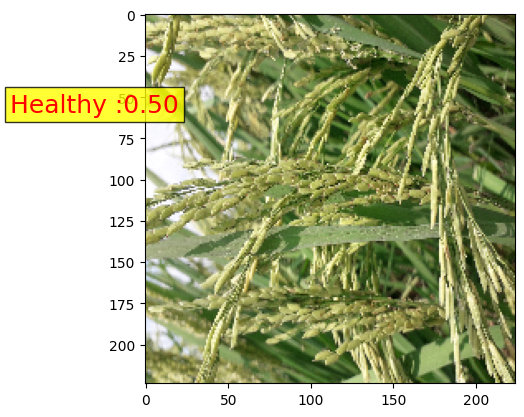

In [51]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('dataset/Split_Dataset/test/Healthy_Images/healthy (180).jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Unhealthy :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='Healthy :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()

1/1 [==============================] - 0s 400ms/step


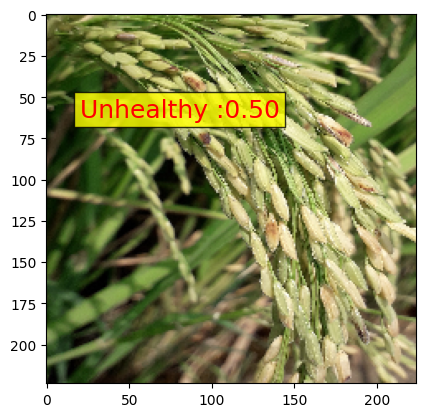

In [54]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('dataset/Unhealthy_Images/unhealthy (5).jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.4):
    value ='Unhealthy :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='Healthy :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()